In [67]:
import math
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import medical_lib as ml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

Einlesen der Daten

In [68]:
medDatamodel3 = pd.read_csv('model5_ausmodel4.csv')
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]
# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [69]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(med_class_test_model3, knnYpred)
precisionKNN = precision_score(med_class_test_model3, knnYpred, average='weighted')
recallKNN = recall_score(med_class_test_model3, knnYpred, average='weighted')
f1scoreKNN = f1_score(med_class_test_model3, knnYpred, average='weighted')
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.5 KNN Precision:  0.49937888198757774 KNN Recall:  0.5 KNN F1-Score:  0.48682476943346503
Tatsächlich:  0.8260869565217391 0.8571428571428571 0.782608695652174 0.8181818181818182
Durchschnittliche Abweichung:  0.8260869565217391
Standartabweichung der Abweichung:  1.0065945132861067


Logistic Regression

In [70]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train_model3,med_class_train_model3)
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(med_class_test_model3, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_recallLogReg = recall_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_f1scoreLogReg = f1_score(med_class_test_model3, lr_y_pred, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.6086956521739131 Log-Regression Precision:  0.4807769726247987 Log-Regression Recall:  0.6086956521739131 Log-Regression F1-Score:  0.533913043478261
Tatsächlich:  0.8695652173913043 0.9473684210526315 0.782608695652174 0.8571428571428571
Durchschnittliche Abweichung:  0.6304347826086957
Standartabweichung der Abweichung:  0.9408297829731481


Decision Tree

In [71]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model3,med_class_train_model3)
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(med_class_test_model3, decTree_pred)
precisionDecTree = precision_score(med_class_test_model3, decTree_pred, average='weighted')
recallDecTree = recall_score(med_class_test_model3, decTree_pred, average='weighted')
f1scoreDecTree = f1_score(med_class_test_model3, decTree_pred, average='weighted')
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.6739130434782609 DecTree Precision:  0.7302371541501976 DecTree Recall:  0.6739130434782609 DecTree F1-Score:  0.6959253250962046
Tatsächlich:  0.9347826086956522 0.8846153846153846 1.0 0.9387755102040816
Durchschnittliche Abweichung:  0.4782608695652174
Standartabweichung der Abweichung:  0.7442279464618996


Random Forest

In [72]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train_model3,med_class_train_model3)
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(med_class_test_model3, rfPred)
precisionRF = precision_score(med_class_test_model3, rfPred, average='weighted')
recallRF = recall_score(med_class_test_model3, rfPred, average='weighted')
f1scoreRF = f1_score(med_class_test_model3, rfPred, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')


Anzahl Estimator: 100  RF Accuracy:  0.6521739130434783 RF Precision:  0.6097584541062802 RF Recall:  0.6521739130434783 RF F1-Score:  0.6290113871635611
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.45652173913043476
Standartabweichung der Abweichung:  0.6822762968032702


ADABoost

In [73]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3,med_class_train_model3)
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.6739130434782609 Precision:  0.6226449275362319 Recall:  0.6739130434782609 f1-Score:  0.6460449704006438
Tatsächlich:  0.9782608695652174 1.0 0.9565217391304348 0.9777777777777777
Durchschnittliche Abweichung:  0.43478260869565216
Standartabweichung der Abweichung:  0.7117698062497783


XGBoost

In [74]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train_model3,med_class_train_model3)
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_5_version_3'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')


XGBOOST:  Accuracy:  0.6521739130434783 Precision:  0.6324637681159421 Recall:  0.6521739130434783 F1-Score:  0.6359806966264767
Tatsächlich:  0.9565217391304348 1.0 0.9130434782608695 0.9545454545454545
Durchschnittliche Abweichung:  0.4782608695652174
Standartabweichung der Abweichung:  0.7442279464618996
#################################################################################################


Feature-Selection

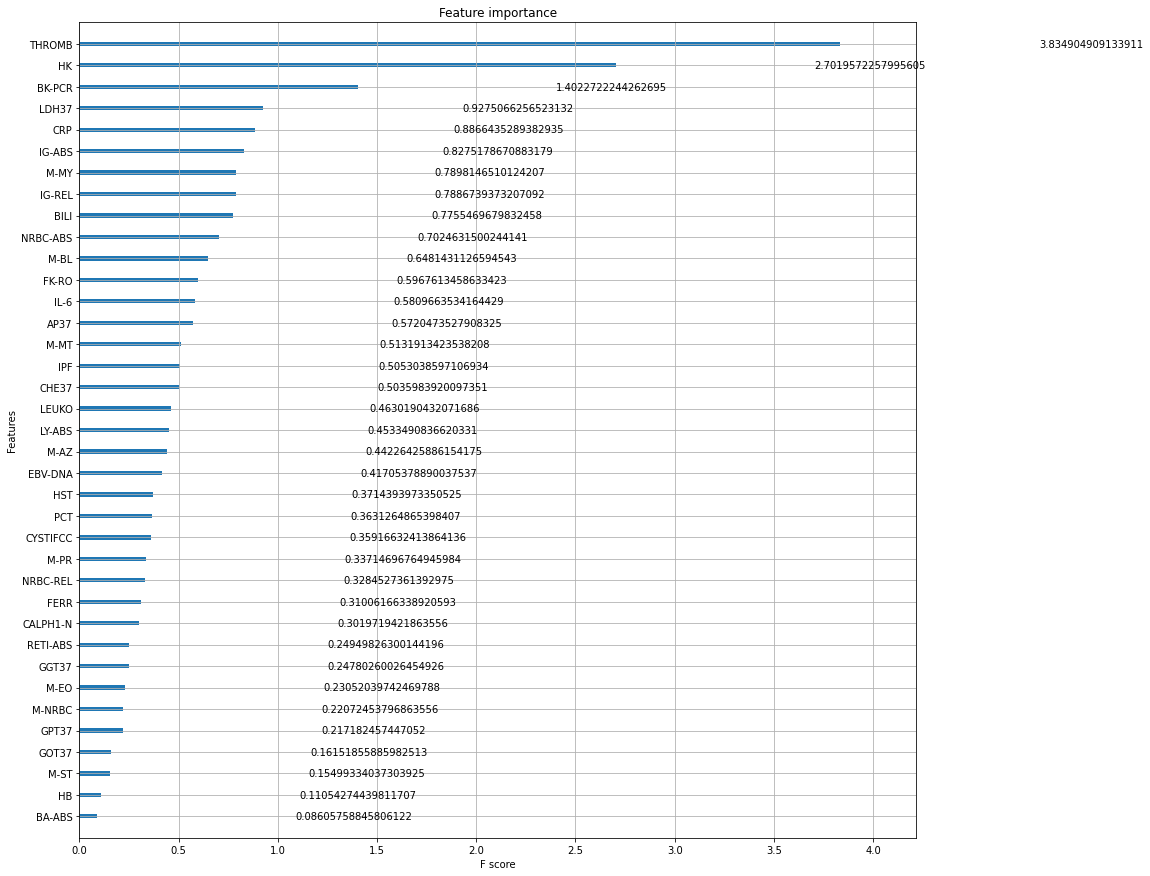

In [75]:
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type = 'gain').items())
pyplot.rcParams['figure.figsize'] = [15,15]
newfeatures = []
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()

In [76]:
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 0.4:
        newfeatures.append(featureranking[i][1])

for el in newfeatures:
    medDataCopy_model3.drop(el, inplace=True, axis=1)
medDataCopy_model3.to_csv('model5_ausmodel4_selection.csv')

Nach Feature-Selection

In [84]:
medDatamodel3 = pd.read_csv('model5_ausmodel4_selection.csv')
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]
# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)
result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]
print(medDataCopy_model3.columns)

Index(['CRP', 'M-BL', 'IL-6', 'BK-PCR', 'EBV-DNA', 'M-MY', 'LDH37', 'BILI',
       'M-MT', 'AP37', 'IPF', 'THROMB', 'LEUKO', 'NRBC-ABS', 'IG-ABS',
       'IG-REL', 'LY-ABS', 'CHE37', 'FK-RO', 'HK', 'status'],
      dtype='object')


KNN

In [78]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(med_class_test_model3, knnYpred)
precisionKNN = precision_score(med_class_test_model3, knnYpred, average='weighted')
recallKNN = recall_score(med_class_test_model3, knnYpred, average='weighted')
f1scoreKNN = f1_score(med_class_test_model3, knnYpred, average='weighted')
print('KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', np.mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')

KNN Accuracy:  0.5652173913043478 KNN Precision:  0.501207729468599 KNN Recall:  0.5652173913043478 KNN F1-Score:  0.5303678929765886
Tatsächlich:  0.8260869565217391 0.8947368421052632 0.7391304347826086 0.8095238095238095
Durchschnittliche Abweichung:  0.7391304347826086
Standartabweichung der Abweichung:  1.0307190948808433


Logistic Regression

In [79]:
lr_model = LogisticRegression()
lr_model.fit(med_features_train_model3,med_class_train_model3)
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(med_class_test_model3, lr_y_pred)
lr_precisionLogReg = precision_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_recallLogReg = recall_score(med_class_test_model3, lr_y_pred, average='weighted')
lr_f1scoreLogReg = f1_score(med_class_test_model3, lr_y_pred, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', np.mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')

Log-Regression Accuracy:  0.5 Log-Regression Precision:  0.26136363636363635 Log-Regression Recall:  0.5 Log-Regression F1-Score:  0.34328358208955223
Tatsächlich:  0.5434782608695652 1.0 0.08695652173913043 0.16
Durchschnittliche Abweichung:  1.2173913043478262
Standartabweichung der Abweichung:  1.4128762442845149


Decision Tree

In [80]:
medical_DecTree = DecisionTreeClassifier(random_state=15)
medical_DecTree = medical_DecTree.fit(med_features_train_model3,med_class_train_model3)
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(med_class_test_model3, decTree_pred)
precisionDecTree = precision_score(med_class_test_model3, decTree_pred, average='weighted')
recallDecTree = recall_score(med_class_test_model3, decTree_pred, average='weighted')
f1scoreDecTree = f1_score(med_class_test_model3, decTree_pred, average='weighted')
print('medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', np.mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

medical_DecTree Accuracy:  0.5652173913043478 DecTree Precision:  0.5632259045302525 DecTree Recall:  0.5652173913043478 DecTree F1-Score:  0.5554865424430642
Tatsächlich:  0.9347826086956522 0.9166666666666666 0.9565217391304348 0.9361702127659574
Durchschnittliche Abweichung:  0.5434782608695652
Standartabweichung der Abweichung:  0.6822762968032702


Random Forest

In [81]:
medical_RF = RandomForestClassifier(random_state=43)
medical_RF.fit(med_features_train_model3,med_class_train_model3)
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(med_class_test_model3, rfPred)
precisionRF = precision_score(med_class_test_model3, rfPred, average='weighted')
recallRF = recall_score(med_class_test_model3, rfPred, average='weighted')
f1scoreRF = f1_score(med_class_test_model3, rfPred, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', np.mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')


Anzahl Estimator: 100  RF Accuracy:  0.6086956521739131 RF Precision:  0.5500152021891153 RF Recall:  0.6086956521739131 RF F1-Score:  0.5763394990103063
Tatsächlich:  0.9347826086956522 1.0 0.8695652173913043 0.9302325581395349
Durchschnittliche Abweichung:  0.4782608695652174
Standartabweichung der Abweichung:  0.6507230237867725


ADABoost

In [82]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3,med_class_train_model3)
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', np.mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

ADABOOST:  Accuracy:  0.6304347826086957 Precision:  0.4794709787963161 Recall:  0.6304347826086957 f1-Score:  0.5434469622449162
Tatsächlich:  0.8695652173913043 1.0 0.7391304347826086 0.85
Durchschnittliche Abweichung:  0.6086956521739131
Standartabweichung der Abweichung:  0.9435884527917698


XGBoost

In [83]:
xgmodel = XGBClassifier(eval_metric='error')
xgmodel.fit(med_features_train_model3,med_class_train_model3)
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', np.mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_5_version_3_selected'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')


XGBOOST:  Accuracy:  0.6086956521739131 Precision:  0.595108695652174 Recall:  0.6086956521739131 F1-Score:  0.5986008325624421
Tatsächlich:  0.9782608695652174 1.0 0.9565217391304348 0.9777777777777777
Durchschnittliche Abweichung:  0.5217391304347826
Standartabweichung der Abweichung:  0.7442279464618995
#################################################################################################
